# Overview

* Source: univariate maps from SPM 
`scripts/step04_SPM/6cond_highlowcue_rampupplateau/s05_6condramp_stimlinear_dummy.mlx`
* Contrast map: Modeling the stimulus epoch, the main effect of stimulus intensity is plotted here. 
* Research question: Which voxels are related to increasing levels of intensity per domain?


In [1]:
# load brain data
# plot subcortical in canlab atlas
# plot parcel in glasser
# plot in MNI
import os
from os.path import join
from neuromaps.parcellate import Parcellater
from matplotlib.colors import LinearSegmentedColormap, to_rgba
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting
from neuromaps.datasets import fetch_fslr
from neuromaps import transforms

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


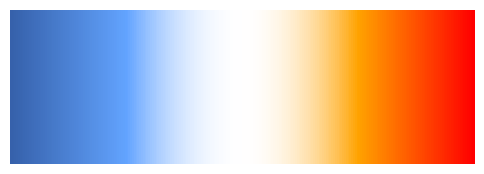

In [2]:
# Define the colors at specific points
colors = [
    (-2, "#120041"),  # Start with blue at -1.9
    (-1.5, "#2500fa"),
    (-1, "#84c6fd"),  # Start with blue at -1.9
    (0, "white"),    # Transition to white at 0
    (1, "#d50044"),
    (1.5, "#C5263A"),    # Start transitioning to red just after 0 towards 1.2
    (2, "#ffd400")  # End with yellow at 1.2
]

colors_with_opacity = [
    (-2, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-1, to_rgba("#63a4ff", alpha=1)),  # Fully opaque
    # (-0.1, to_rgba("#008bff", alpha=0.6)),  # Fully opaque
    (0, to_rgba("white", alpha=0)),       # Fully opaque
    # (0.1, to_rgba("#d50044", alpha=0.6)),   # 30% opacity
    (1, to_rgba("#ffa300", alpha=1)),   # 60% opacity
    (2, to_rgba("#C5263A", alpha=1.0))    # Fully opaque
]



# Normalize the points to the [0, 1] interval
norm_points = np.linspace(-2, 2, len(colors_with_opacity))
norm_colors = [c[1] for c in colors_with_opacity]
norm_points = (norm_points - norm_points.min()) / (norm_points.max() - norm_points.min())

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient image
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()

In [3]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', color_range=None):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))


In [4]:
con_dir = '/Users/h/Documents/projects_local/cue_expectancy/resources/plots_dissertation/SPM_univariate/6cond_highlowcue_rampupplateau'
# pain_fname = join(con_dir,'P_simple_STIM_stimlin_high_gt_low_fdr_t_001.nii')
# vic_fname = join(con_dir,'V_simple_STIM_stimlin_high_gt_low_fdr_t_05.nii')
# cog_fname = join(con_dir,'C_simple_STIM_stimlin_high_gt_low_fdr_t_05.nii')

pain_fname = join(con_dir,'model01-6cond_epoch-stim_dummy-stimlinearP_simple_STIM_stimlin_high_gt_low_fdr-001.nii')
vic_fname = join(con_dir,'model01-6cond_epoch-stim_dummy-stimlinearV_simple_STIM_stimlin_high_gt_low_fdr-001.nii')
cog_fname = join(con_dir,'model01-6cond_epoch-stim_dummy-stimlinearC_simple_STIM_stimlin_high_gt_low_fdr-001.nii')


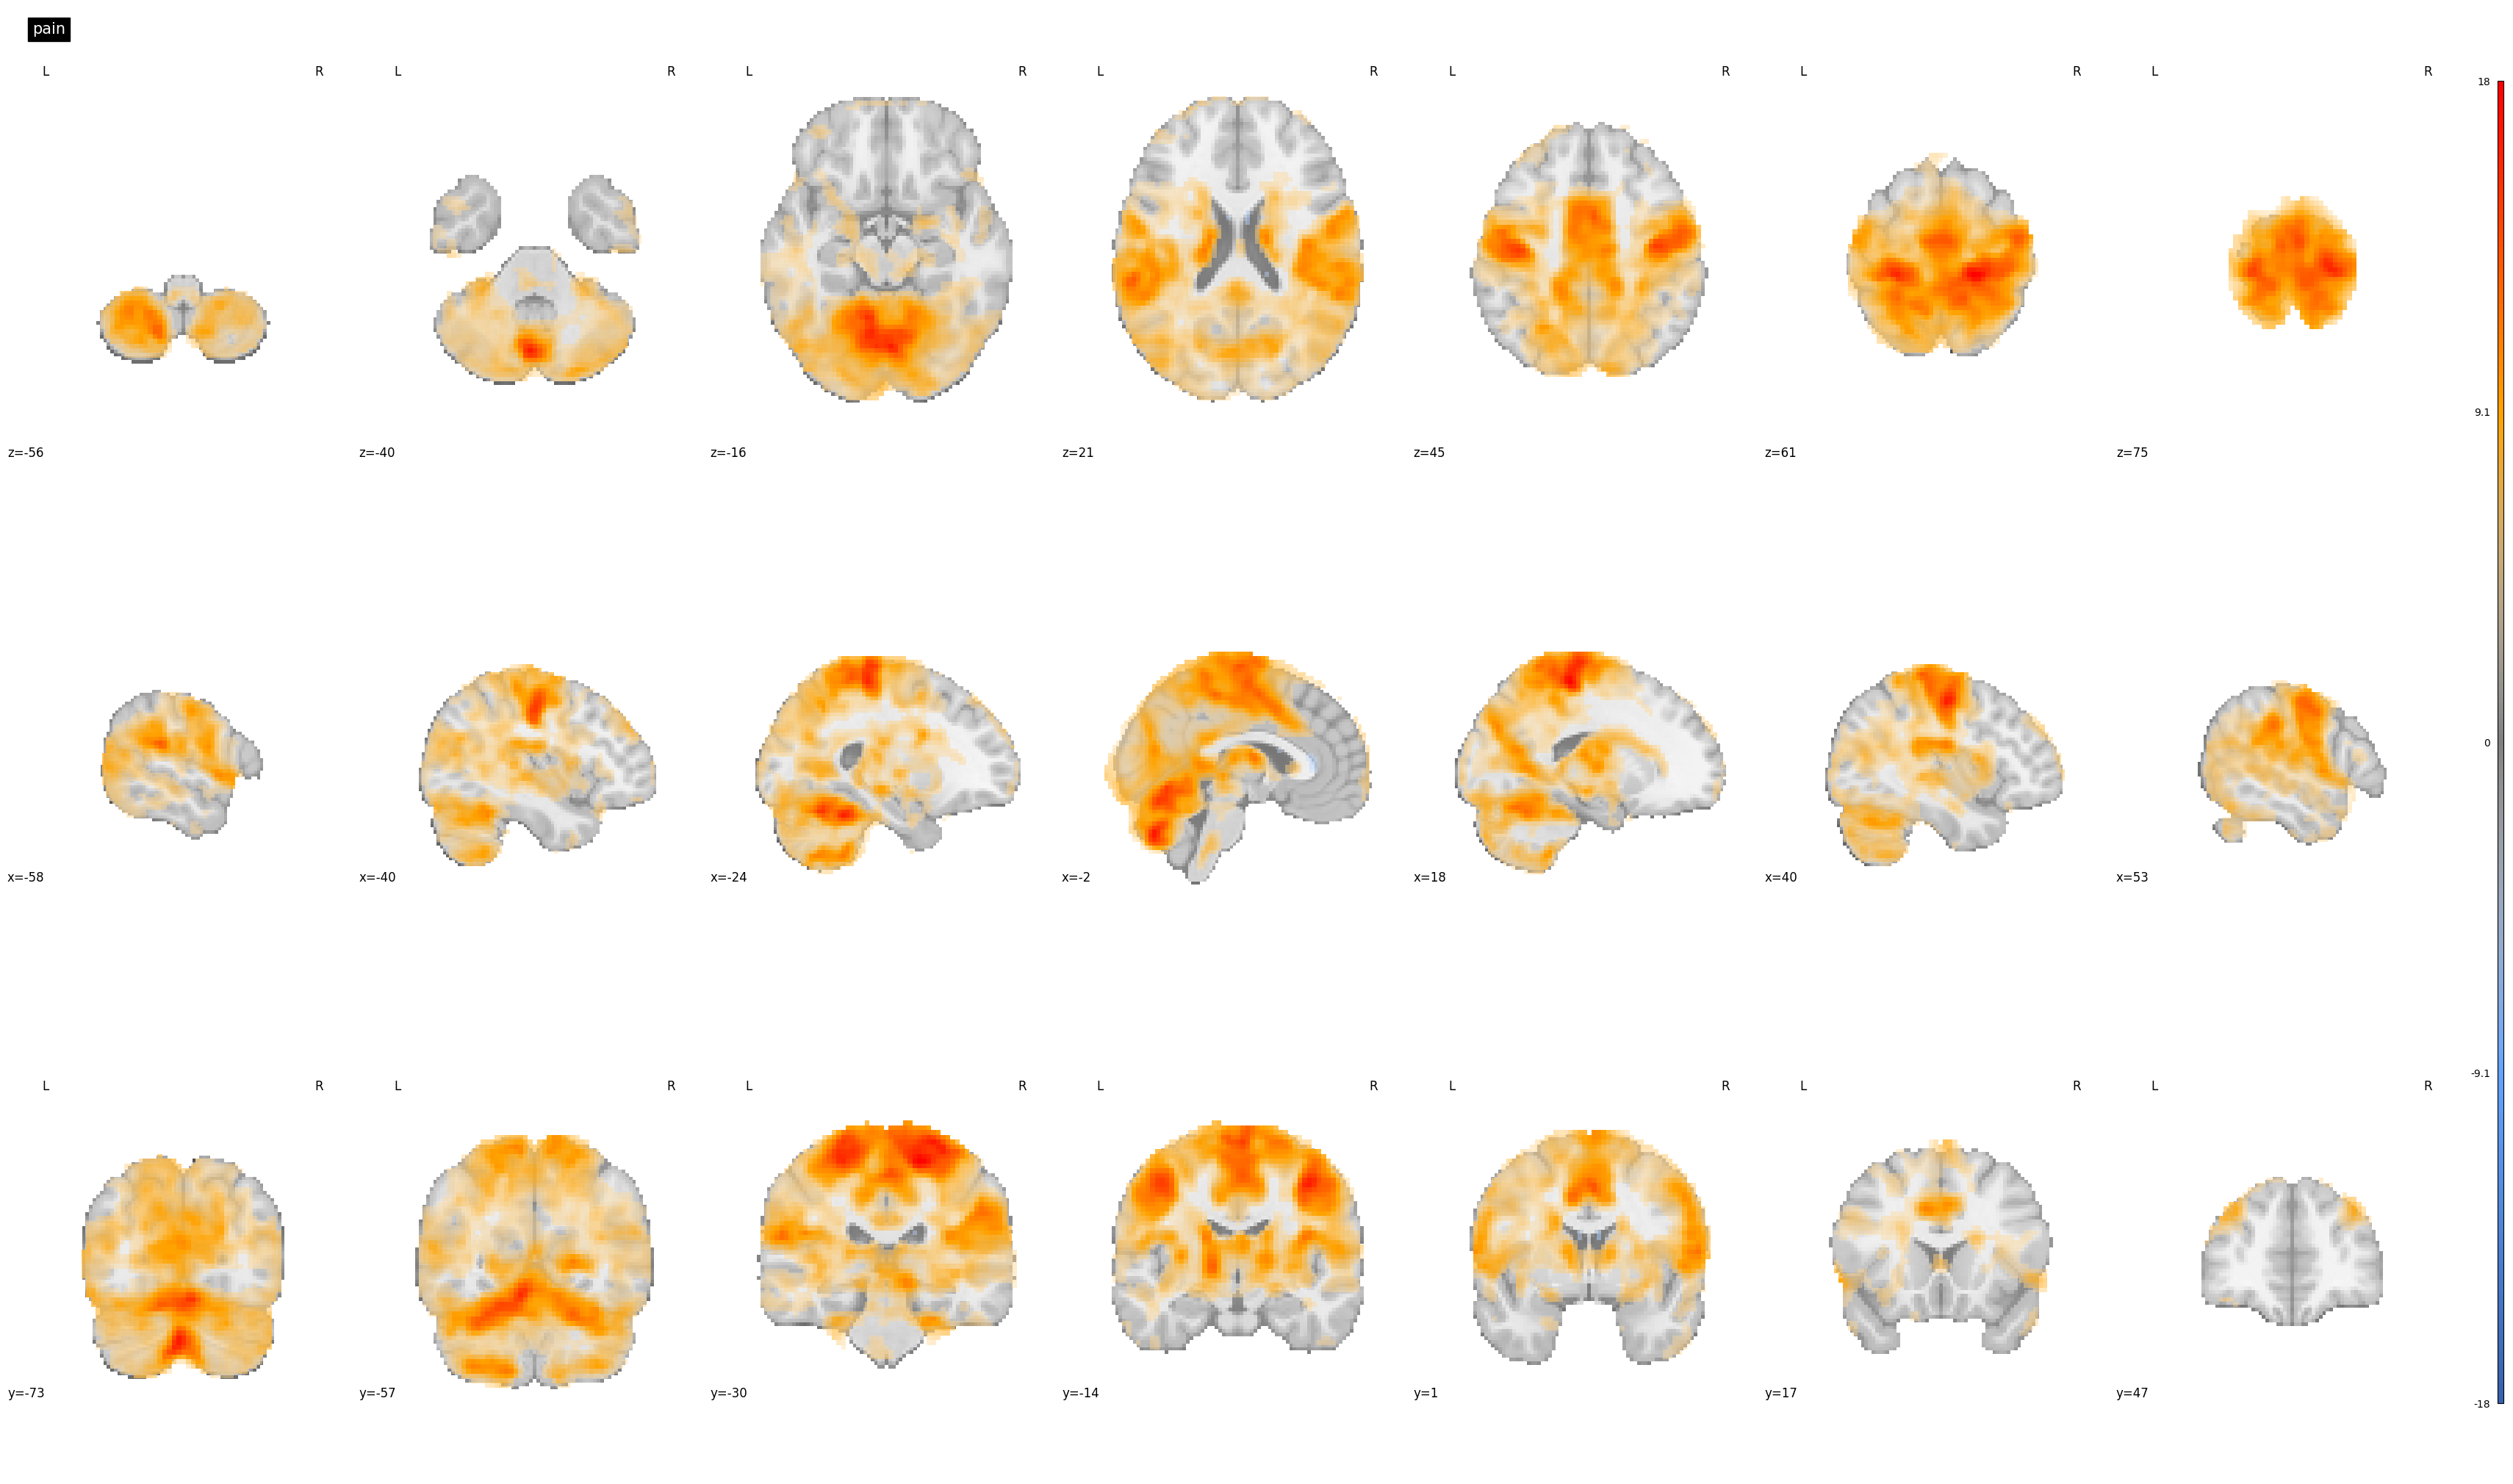

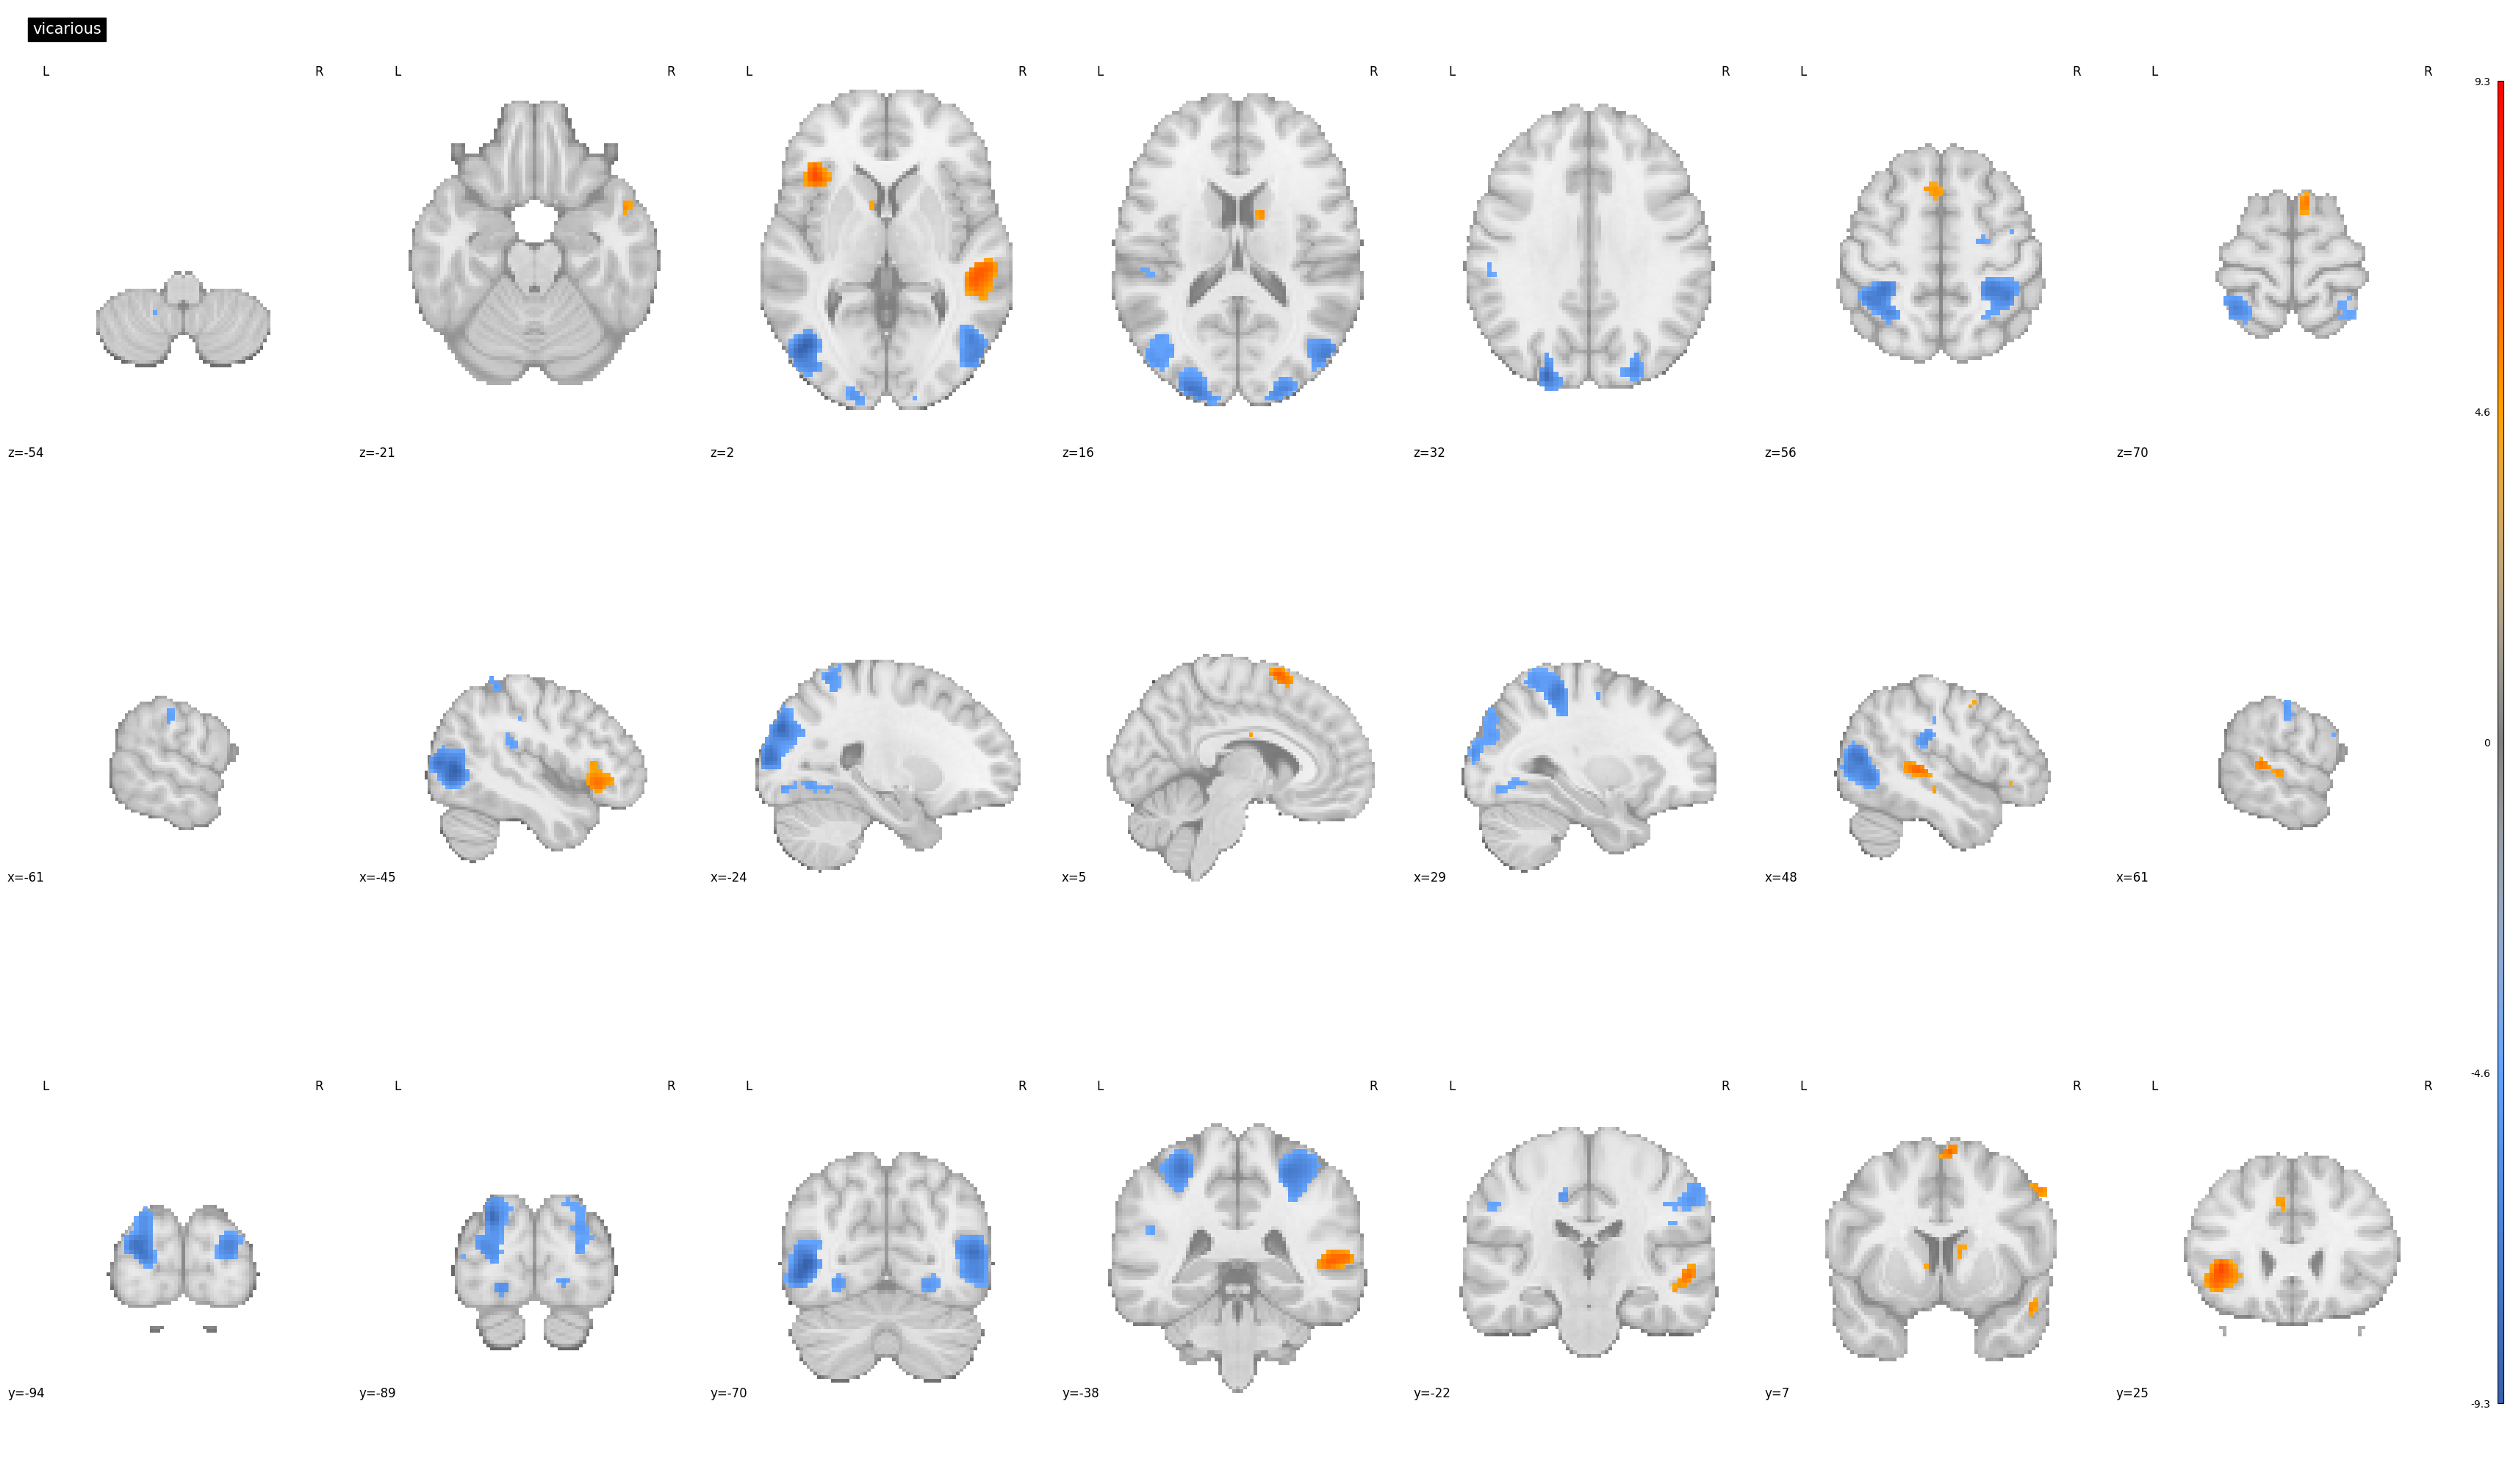

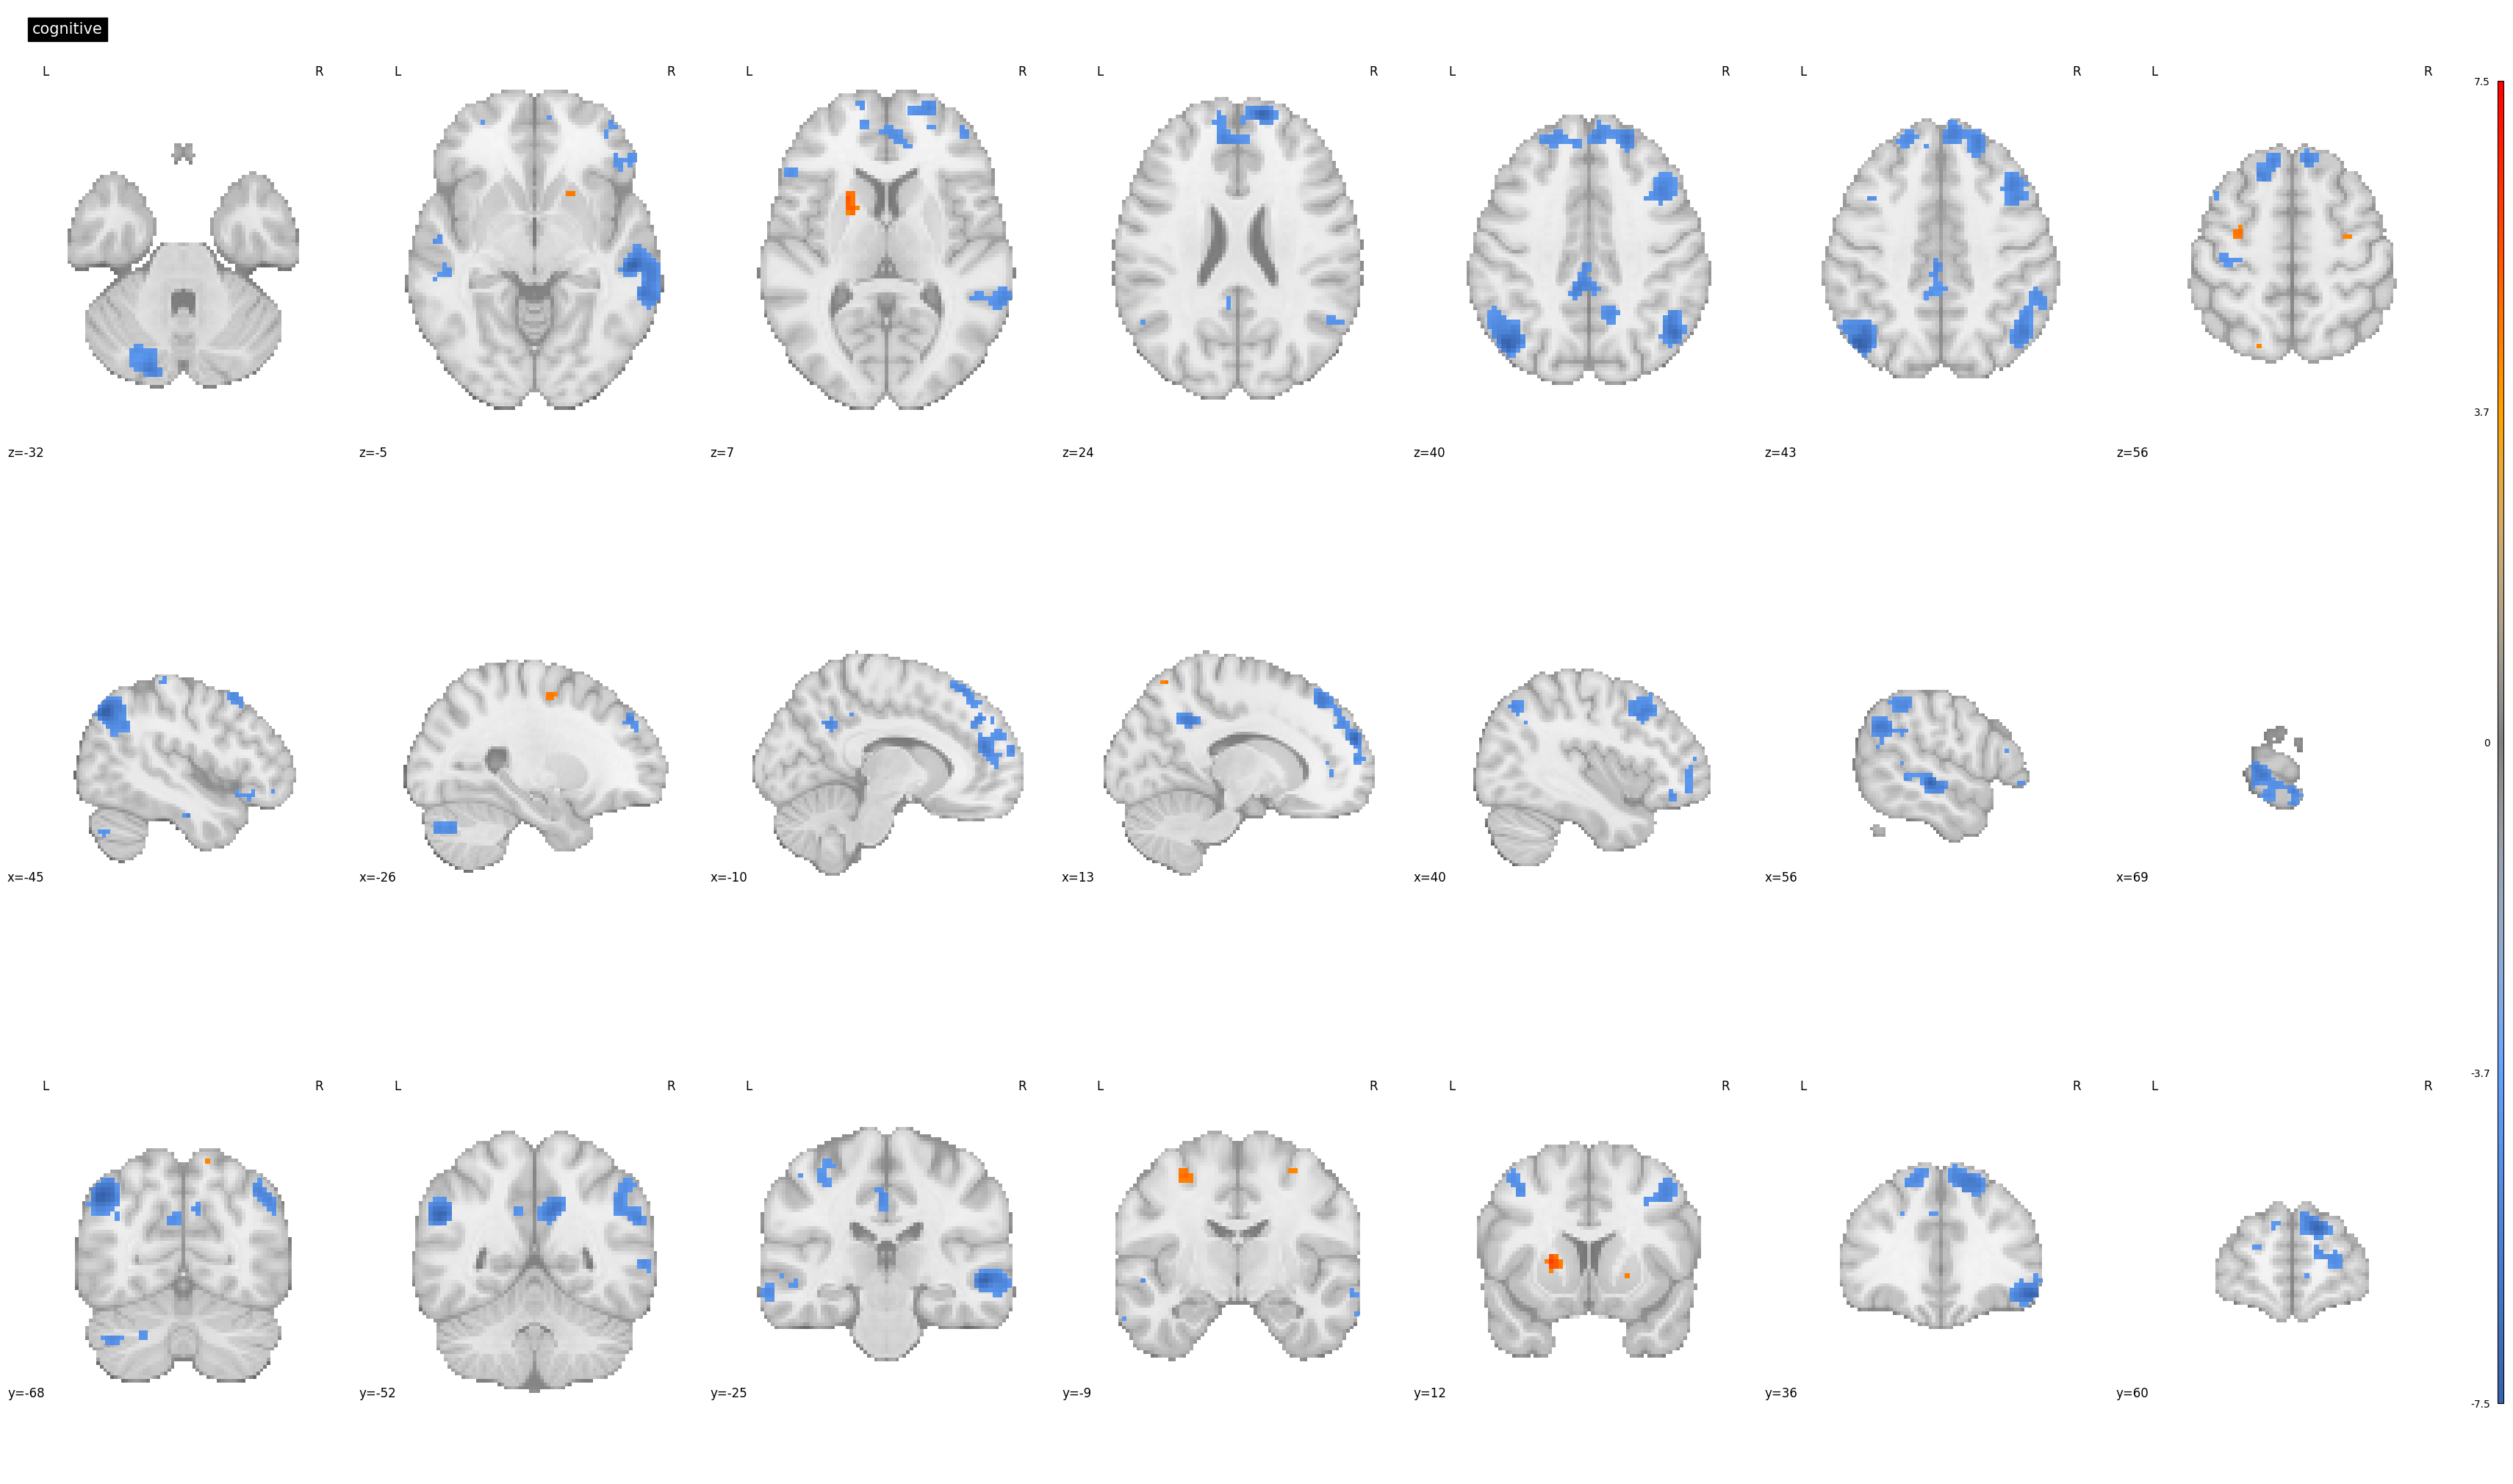

In [5]:
pain_mni = plotting.plot_stat_map(image.load_img(pain_fname), display_mode='mosaic', title='pain', cmap=cmap)
vic_mni = plotting.plot_stat_map(image.load_img(vic_fname), display_mode='mosaic', title='vicarious', cmap=cmap)
cog_mni = plotting.plot_stat_map(image.load_img(cog_fname), display_mode='mosaic', title='cognitive', cmap=cmap)

In [87]:
min_pain = min(np.min(pain_stim_fslr[0].agg_data()), np.min(pain_stim_fslr[1].agg_data()))
min_pain

-0.9202043

## transform Tmap into surface plots

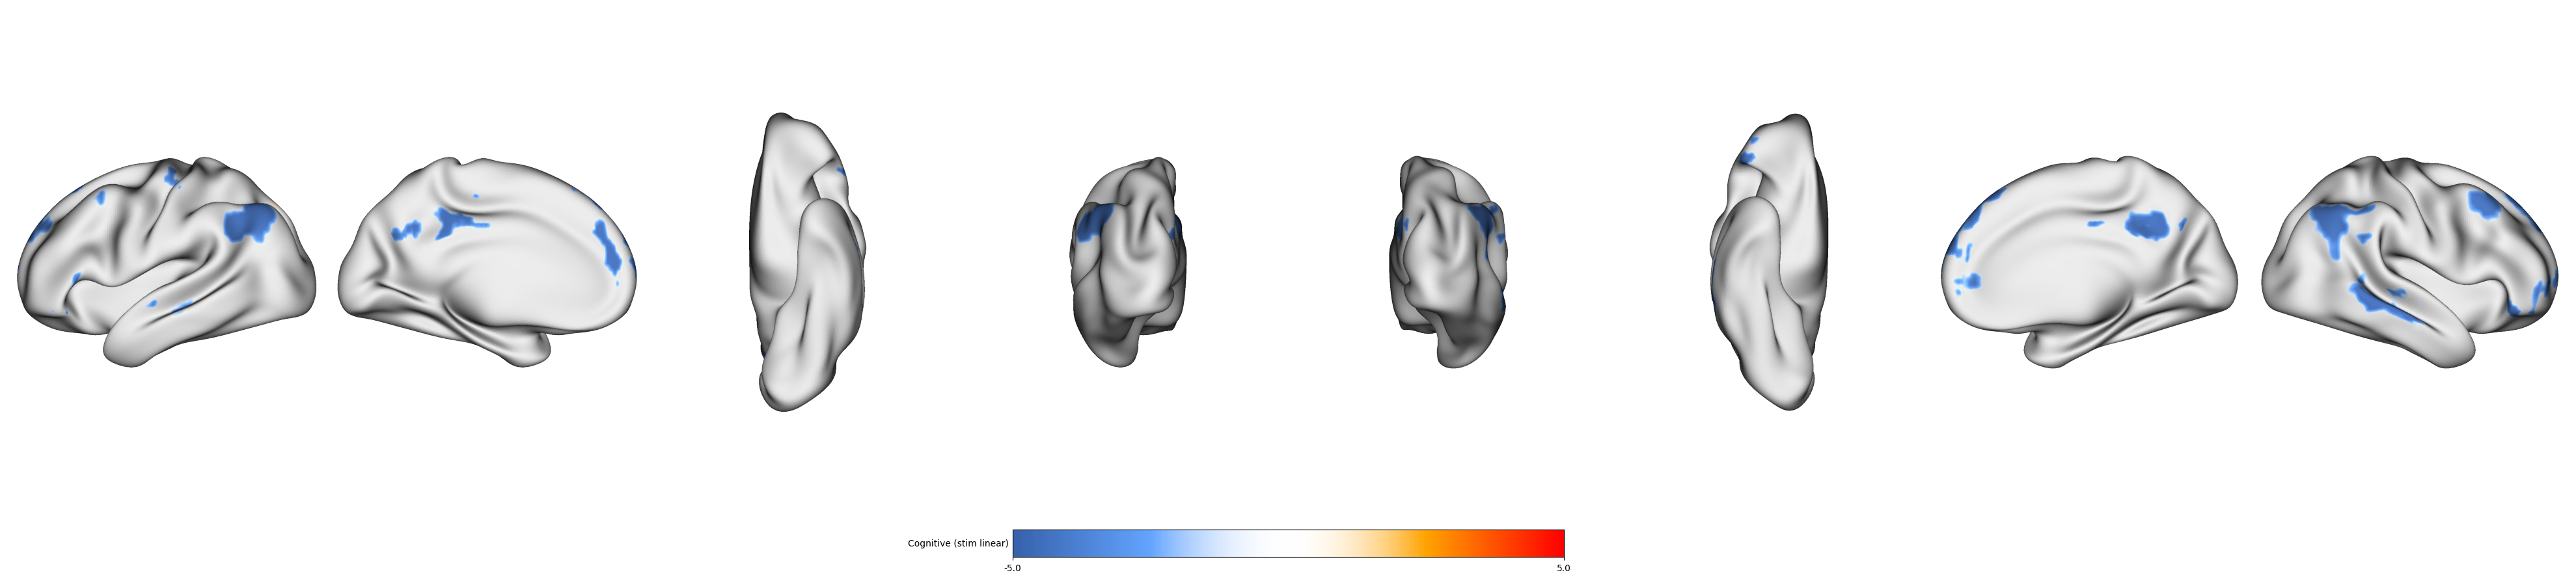

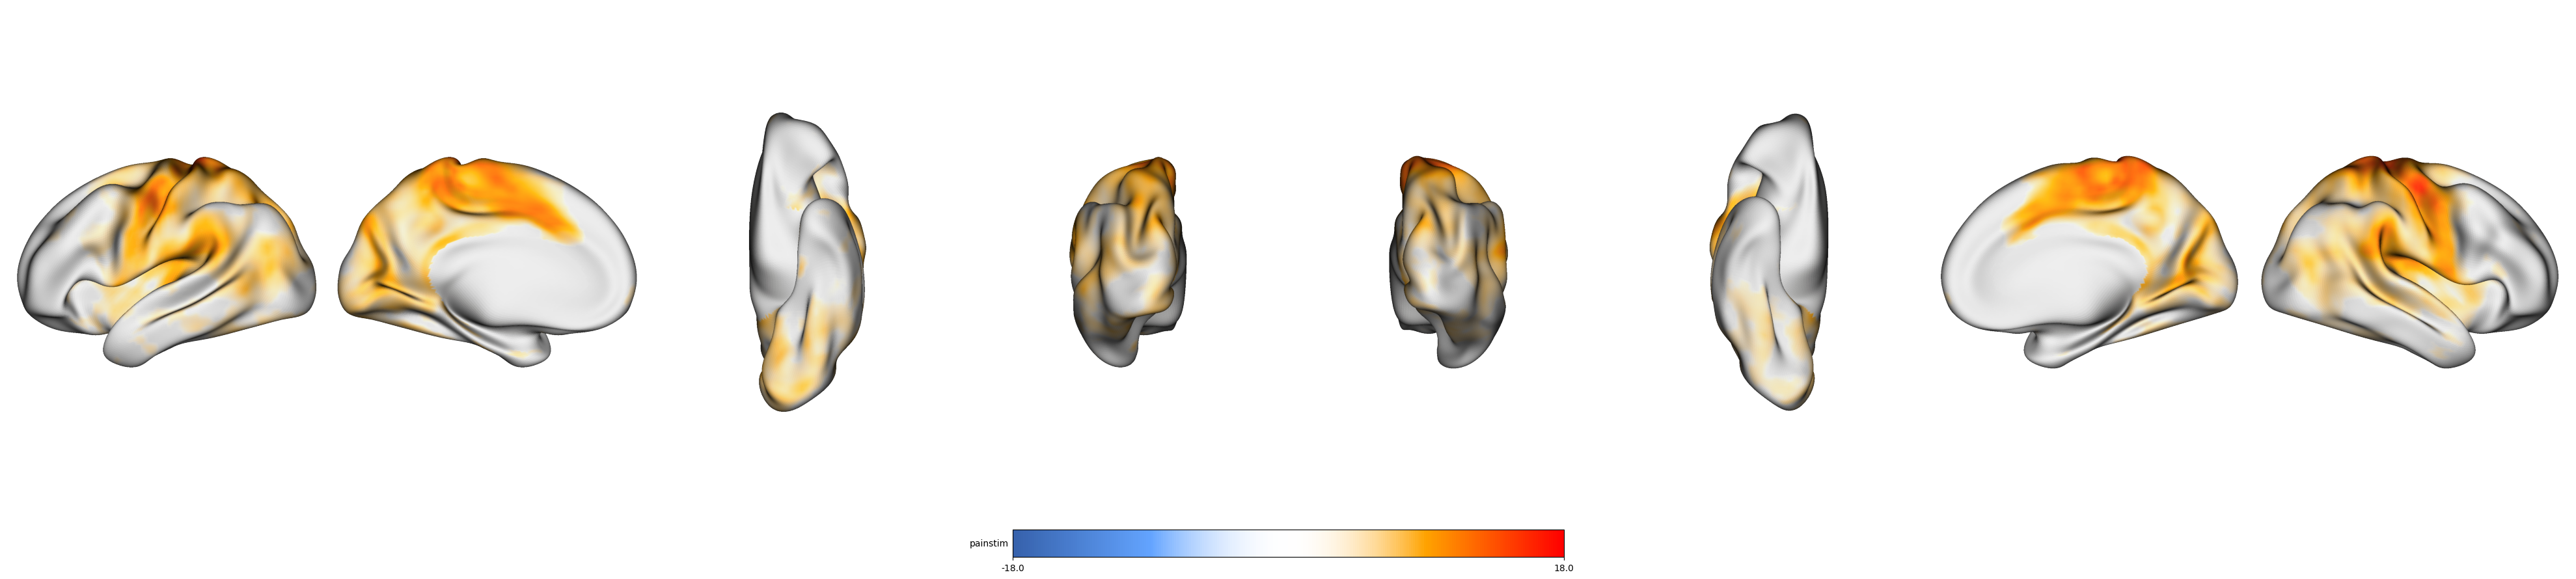

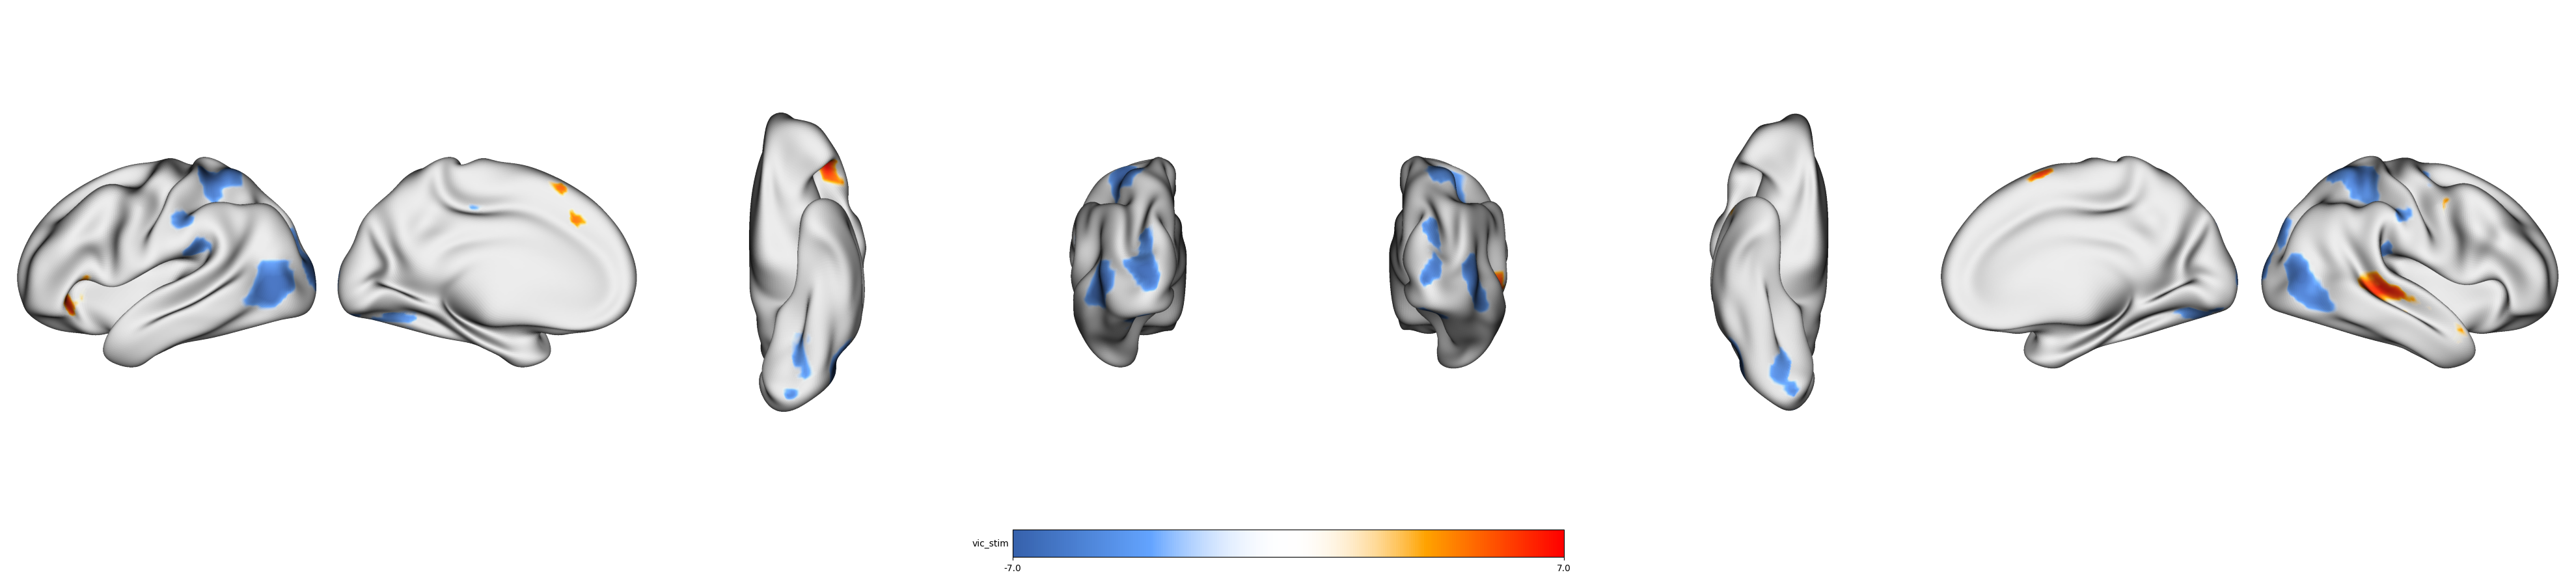

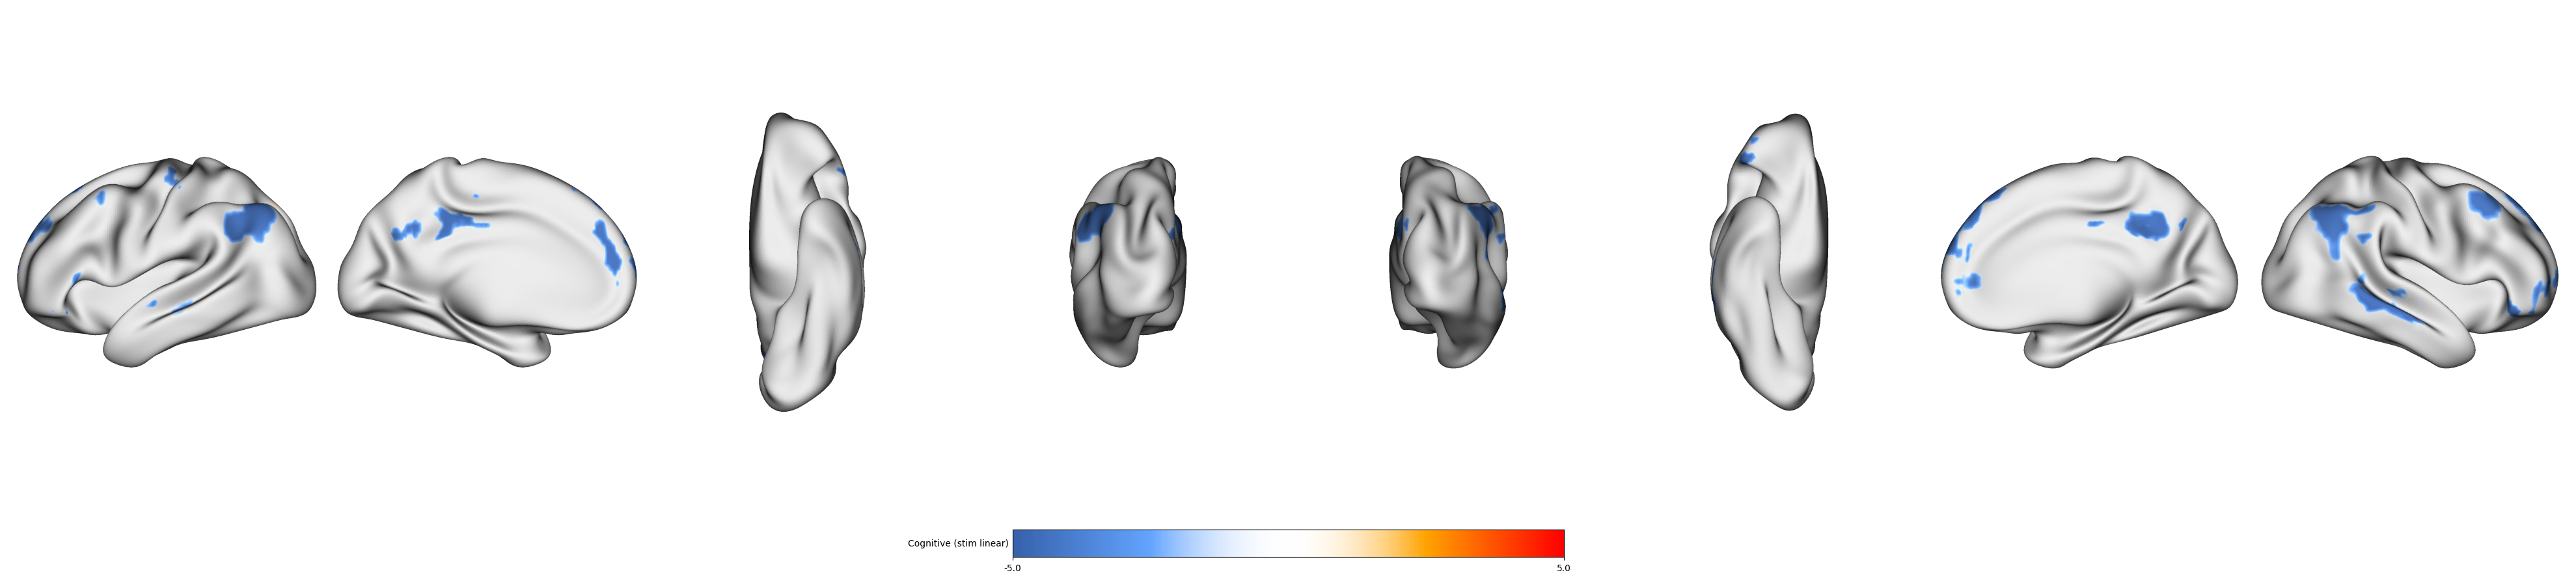

In [6]:

pain_stim_fslr = transforms.mni152_to_fslr(pain_fname, fslr_density='32k', 
    method='linear')
max_pain = max(np.max(pain_stim_fslr[0].agg_data()), np.max(pain_stim_fslr[1].agg_data()))
plot_brain_surfaces(pain_stim_fslr, cbar_label='painstim', cmap=cmap, 
                    color_range=(-np.round(max_pain), np.round(np.max(max_pain))))


vic_stim_fslr = transforms.mni152_to_fslr(vic_fname, fslr_density='32k', 
    method='linear')
max_vic = max(np.max(vic_stim_fslr[0].agg_data()), np.max(vic_stim_fslr[1].agg_data()))
plot_brain_surfaces(vic_stim_fslr, cbar_label='vic_stim', cmap=cmap, 
                    color_range=(-np.round(max_vic), np.round(max_vic)))

cog_stim_fslr = transforms.mni152_to_fslr(cog_fname, fslr_density='32k', 
    method='linear')
max_cog = max(np.max(cog_stim_fslr[0].agg_data()), np.max(cog_stim_fslr[1].agg_data()))
plot_brain_surfaces(cog_stim_fslr, cbar_label='Cognitive (stim linear)', cmap=cmap,
                    color_range=(-np.round(max_cog), np.round(np.max(max_cog))))

In [10]:
canlab2023 = '/Users/h/Documents/projects_local/cue_expectancy/data/atlas/CANLab2023_MNI152NLin6Asym_coarse_2mm_cifti_vols.nii.gz'
parc = Parcellater(parcellation=canlab2023, 
                       space='MNI152', 
                       resampling_target='parcellation')
parcelarray = []
metadata = []
for fname in [pain_fname, vic_fname, cog_fname]:
    metadata.append(os.path.basename(fname))
    singletrial_parc = parc.fit_transform(fname, 'MNI152') # (1, 595)
    parcelarray.append(singletrial_parc)



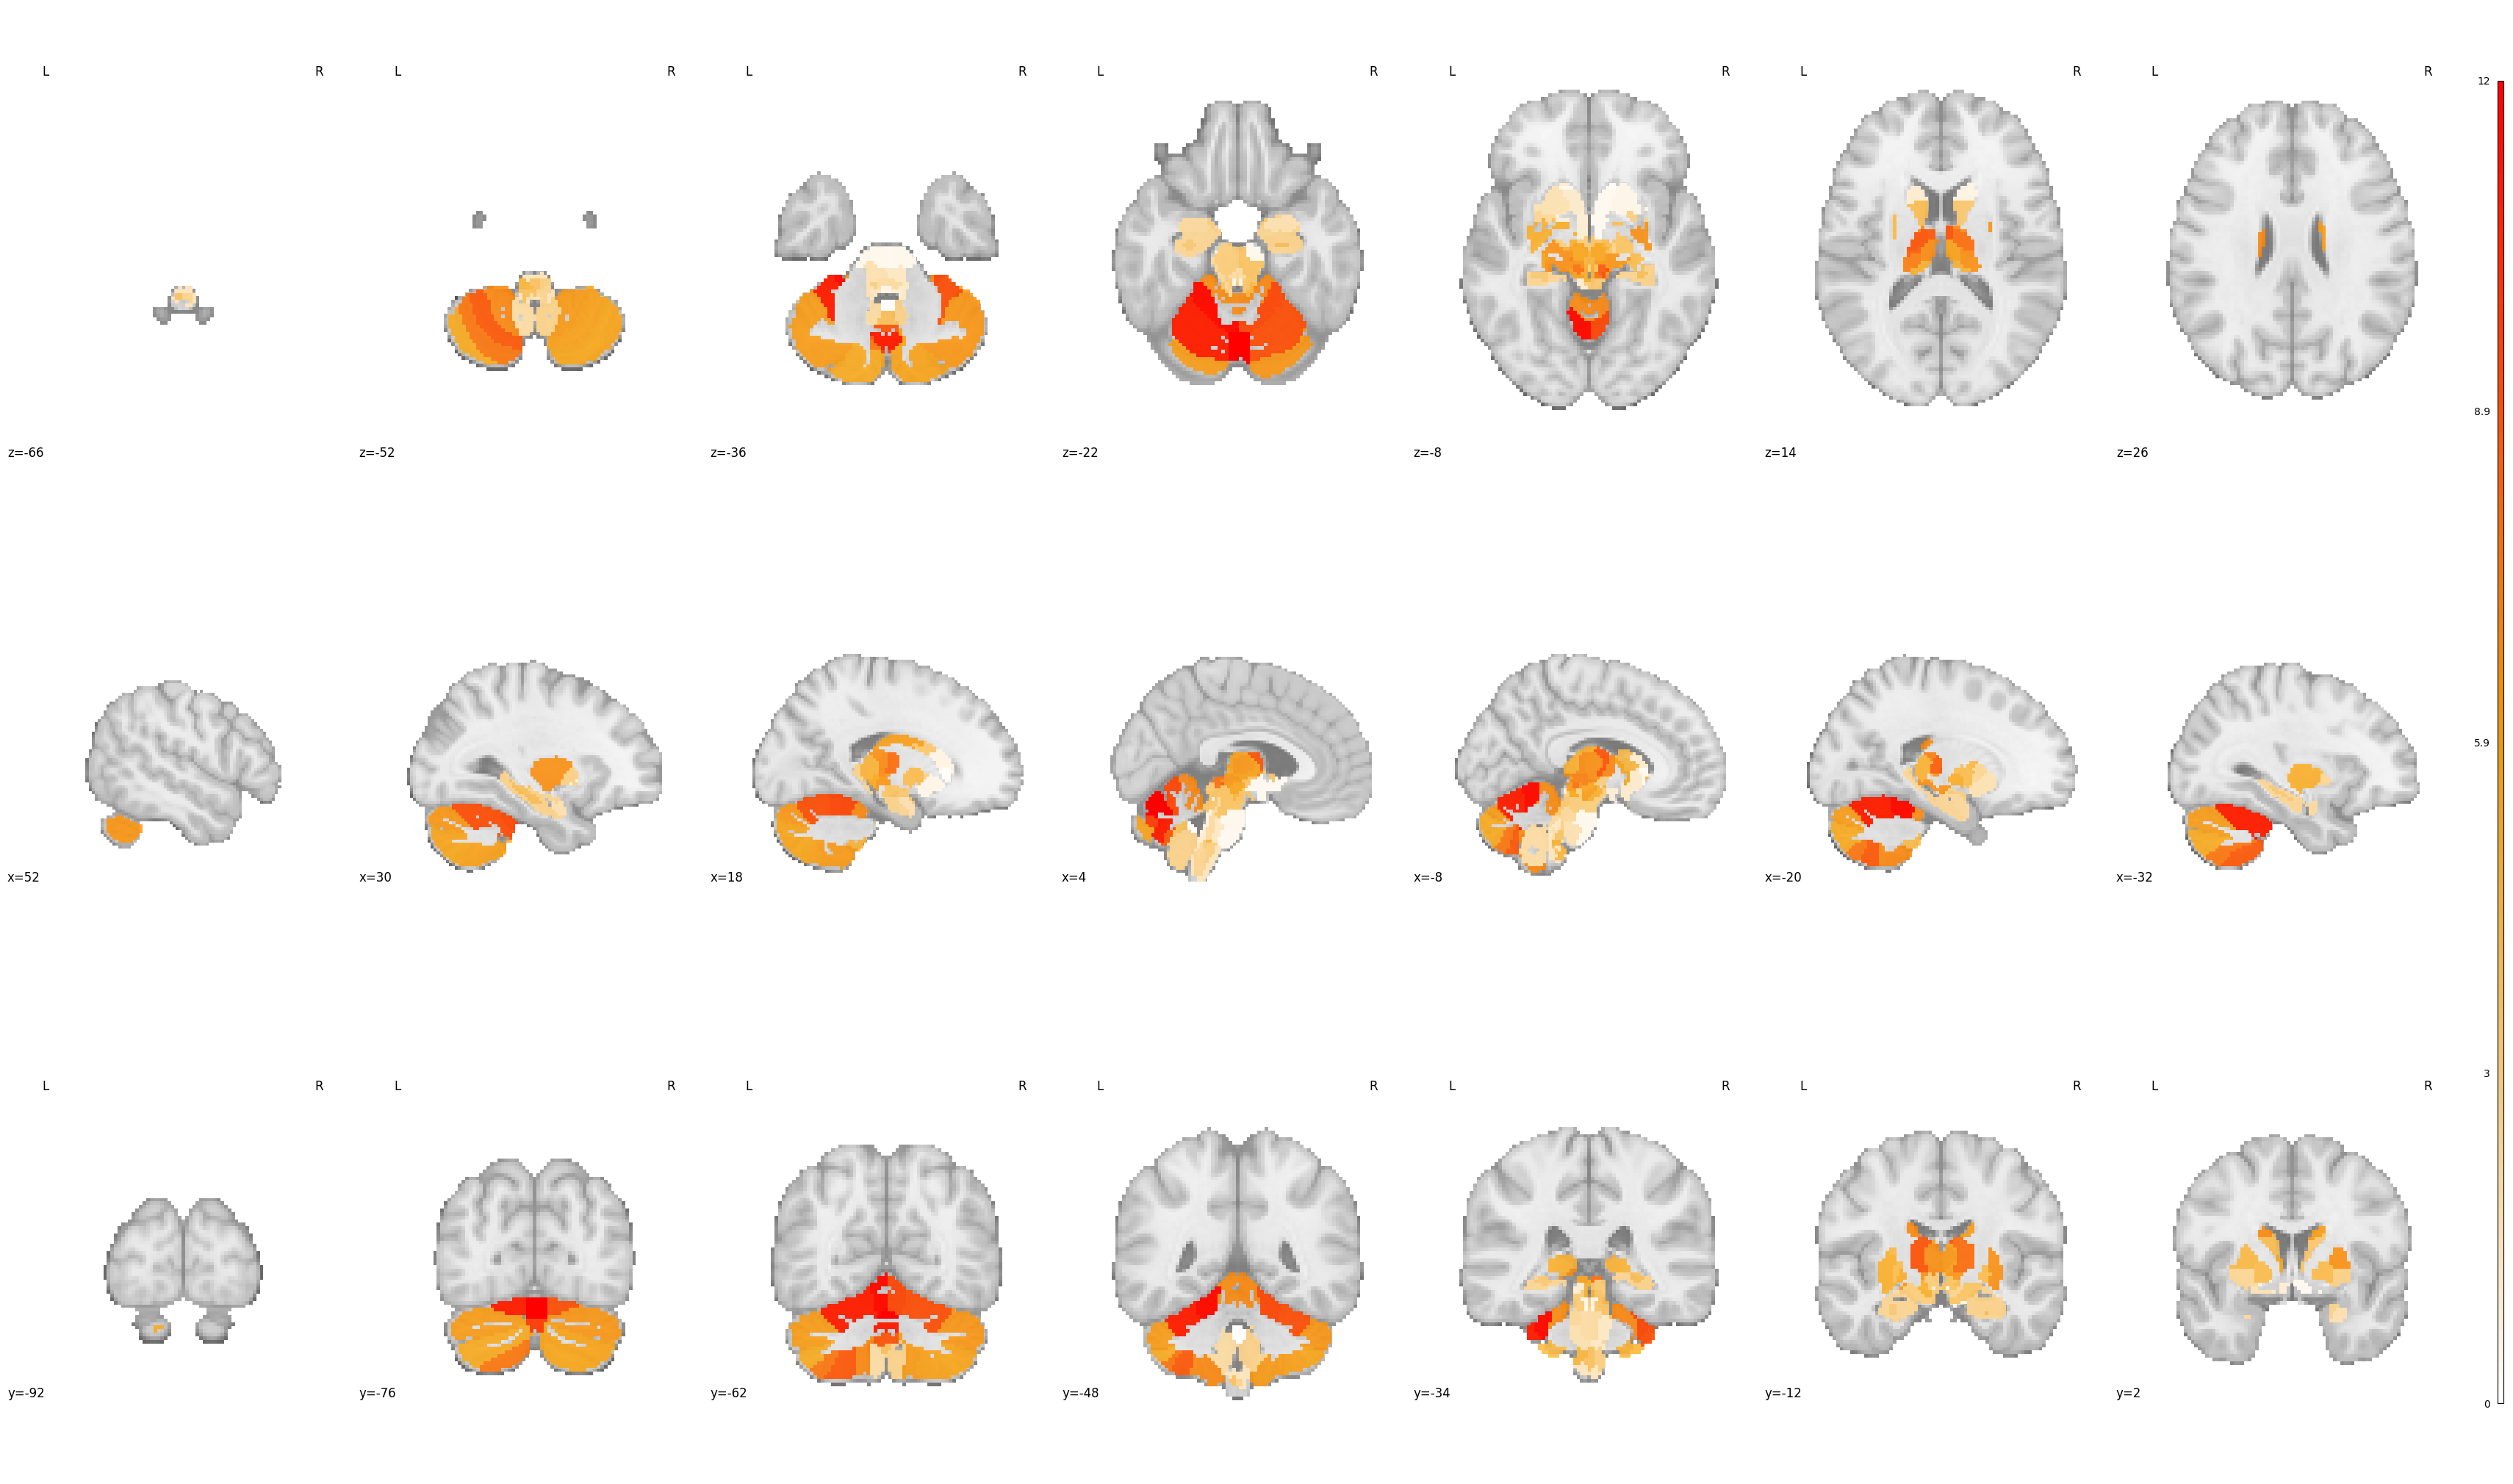

In [11]:
pain_mni = plotting.plot_stat_map(parc.inverse_transform(parcelarray[0]), display_mode='mosaic', cmap=cmap)

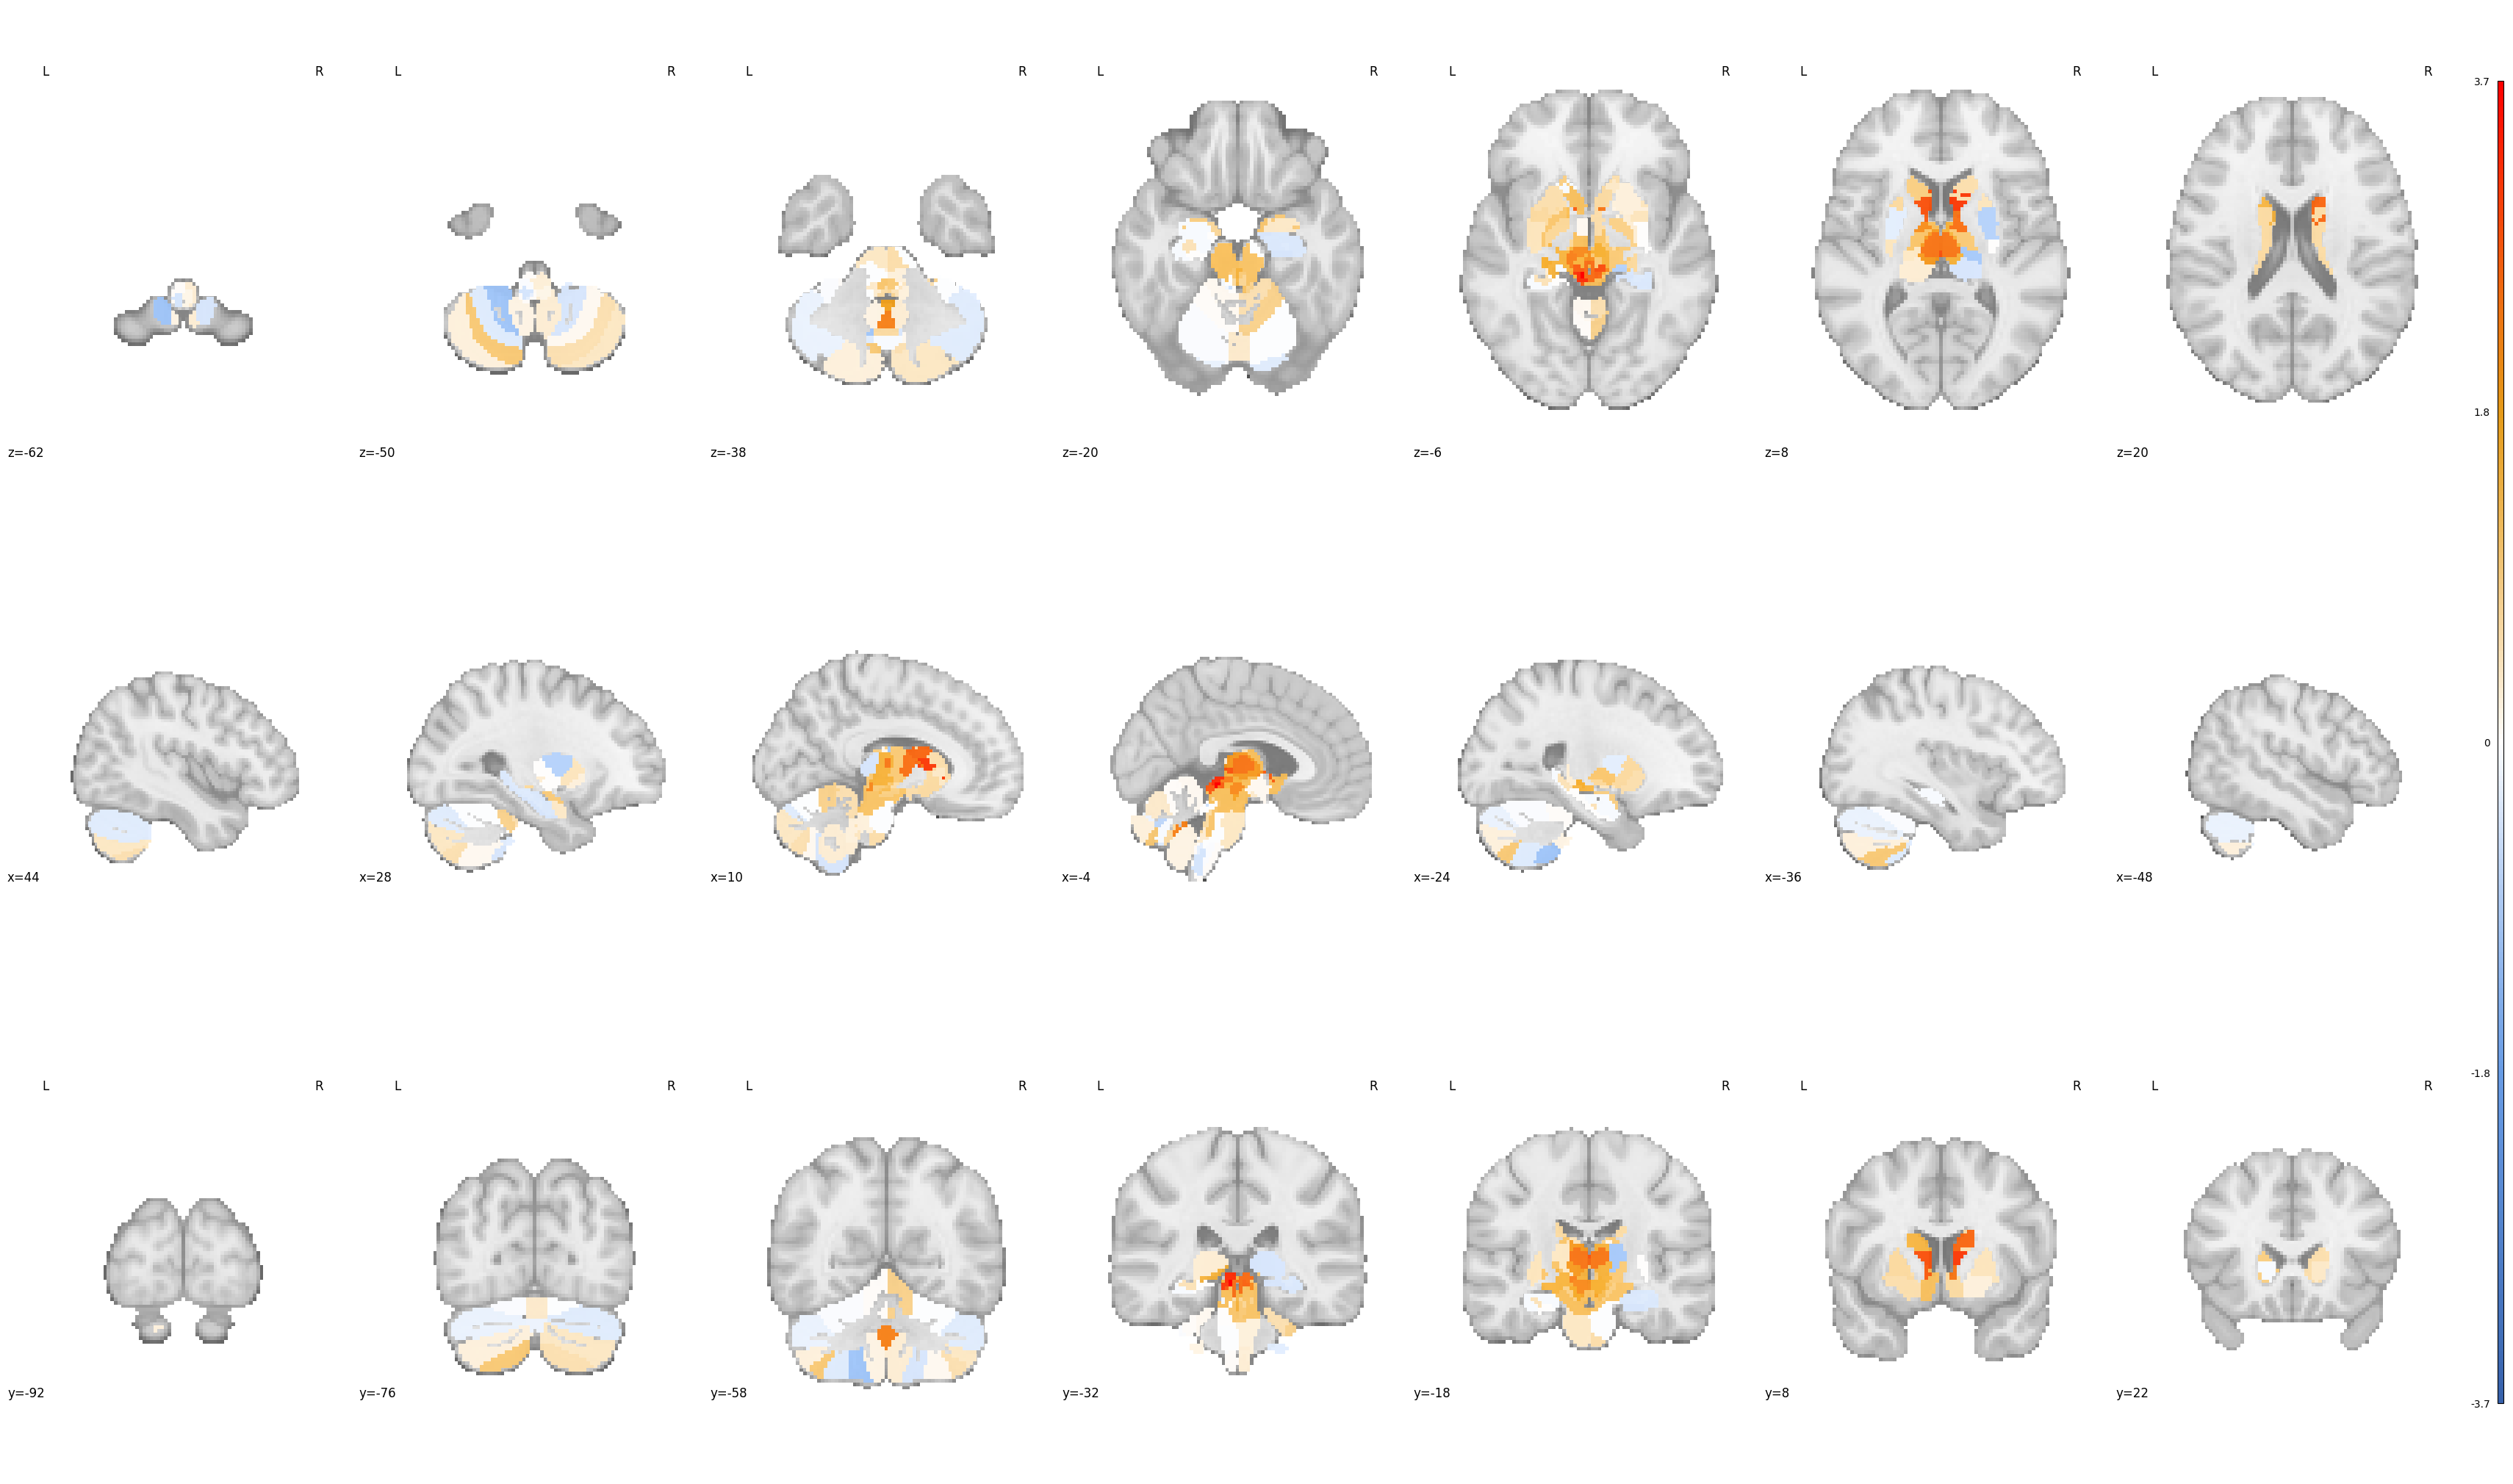

In [42]:
vic_mni = plotting.plot_stat_map(parc.inverse_transform(parcelarray[1]), display_mode='mosaic', cmap=cmap)

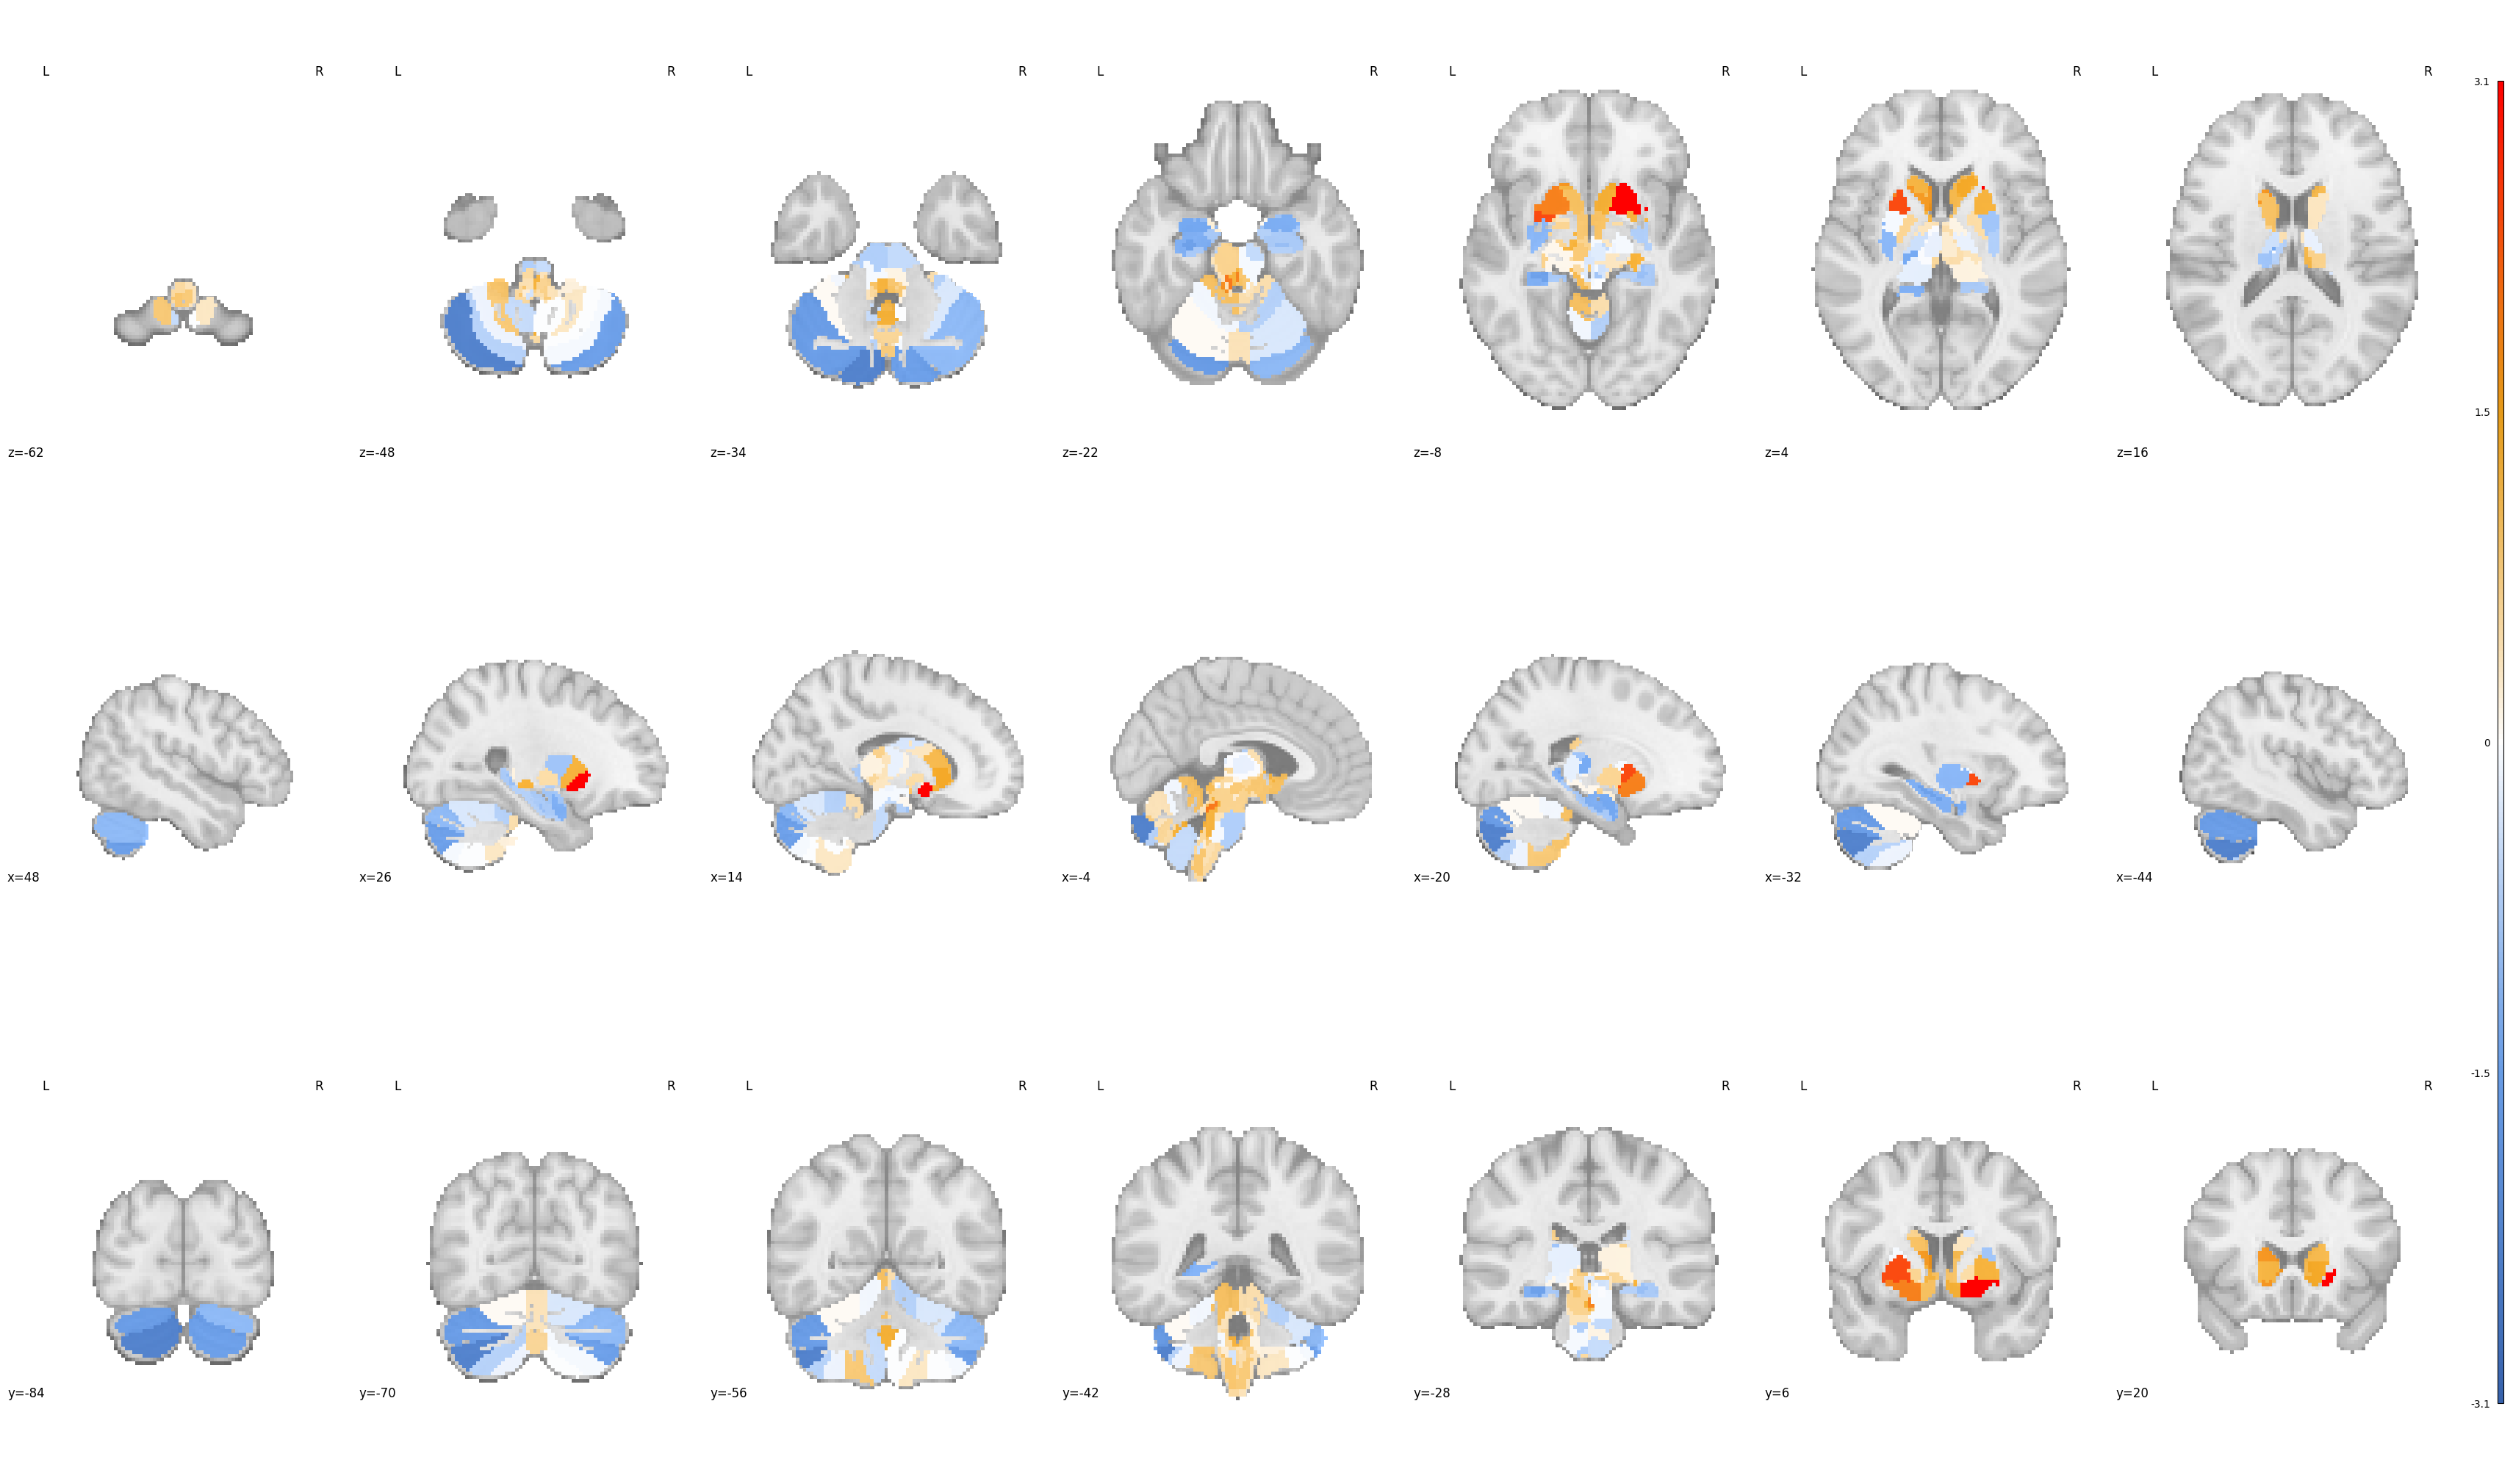

In [43]:
cog_mni = plotting.plot_stat_map(parc.inverse_transform(parcelarray[2]), display_mode='mosaic', cmap=cmap)